# Introduction to reinforcement learning

Reinforcement Learning is the third paradigm of machine learning, there is supervised, unsupervised and reinforcement learning. 

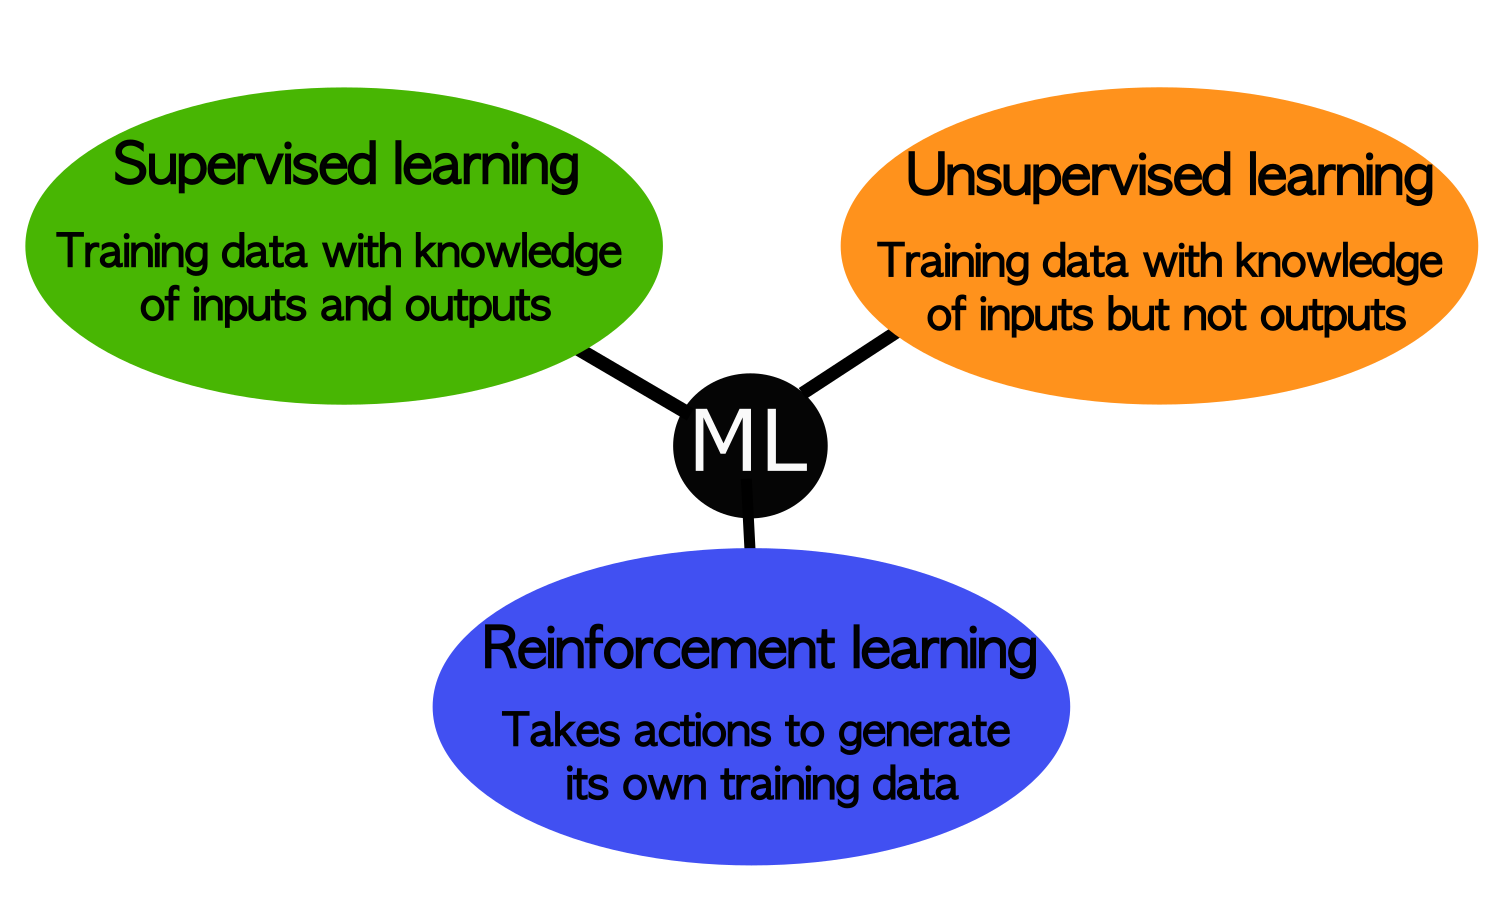

What makes reinforcement learning different:
 - There is no supervision, nothing to tell it what action was best, just a reward signal
 - Feedback is delayed - the information it gets about an action will only come much later after a series of actions
 - Data is not iid, what an agent does at each step in time is highly correlated to the previous steps. 
 - Agent takes actions to influence its environment


There are some other great training resources around for reinforcement learning, I'll list a few here
 - Great intro course from David Silver (AlphaGo etc) - https://www.youtube.com/watch?v=2pWv7GOvuf0&list=PLqYmG7hTraZDM-OYHWgPebj2MfCFzFObQ
 - Intro notes - Sutton and Barto - https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf
 - Open AI spinning up documentation - https://spinningup.openai.com/en/latest/index.html



# Key concepts

---

<h3 style="text-align: center"> Environment and Agent</h3>

The environment describes the world in the agent operates.  This is usually defined as a markov process, where each node is a state and the edge is an action which leads to a new state(node)

---

<h3 style="text-align: center"> States and observations</h3>

symbols -> $S_i, O_i$

The state refers to the conditions of the environment at a given time, so where a cart is what angle the pole is at etc. \
The observations are how the agenst sees the state, this could be a complete observations of the state itself, or could be only some elements of the state. 

---
<h3 style="text-align: center"> Actions</h3>

symbols -> $a_i$

The actions define the choices that an agent can make within an enironment. These actions can be discrete e.g. the cart can move left or right or continuous the cart moves left with some velocity.

---

<h3 style="text-align: center"> Policy </h3>

symbols -> $\pi(\theta)$

The policy defines how an agent behaves at any time. It is approximately mapping the states(observations) to actions. For example a policy that always moves left might be a bad choice as it does not result in the answer that is desired. This policy can be deterministic, or can be probabalistic, this usually depends on the types of actions and type of environment. More often than not this is where a neural network comes in which can map the current state of the environment to the best possible action.

---

<h3 style="text-align: center"> Reward and Return</h3>

symbols -> $r_i, R$

The reward function defines the goal in RL. This is the information that the environment feeds back to the agent and the agent wants to maximise the total reward in the long run (also known as the return).

Rewards can be stochastic values as they depend on the state of the environment.

We can also define the return here which is the total return over the whole episode (1 game, 1 life etc).

$$
R = \sum_{i=0}^{T} r_i
$$


---

<h3 style="text-align: center"> Value function </h3>

symbols -> $V(S_i)$

Rewards give information on what is good immediately after taking an actions, whereas the value function looks at what is good over the long term. It returns the total amount of reward you could expect over the future if we started at the state $S_i$.

We generally seek out actions that give high values rather than high rewards, as we know it is likely to give us a greater reward in the future.

---

<h3 style="text-align: center"> Model </h3>

The model refers to a model of the environment. This is an optional part. The model might take in the current state and an action and try to predict the next environment state and reward. These can be used for "planning", where the actions can be decided based on this model before it actually experiences those states. 

---

## General goal

**The general goal of all this is to update your policy to maximise the reward that you get.**

The loop that you would follow is:

 - There is and Agent in some environment that will take actions following some policy. 
 - The Agent will take some action. 
 - The Environment may change based on that action and return a new state and obersvation. 
 - The Agent will take another action based on the observation of the state.


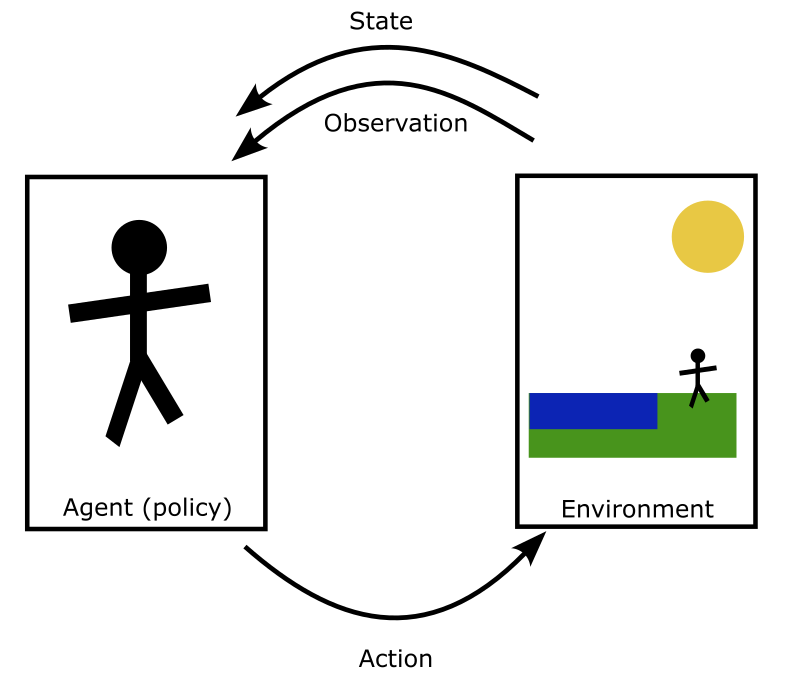

# Random policy

First though to run through the standard motions of a RL algorithms, we will use a simple policy function which chooses random actions every time. (This is probably not a good policy but it is one)

We will be using gym to simulate a cart which has to balance a pole upright, where its only actions are to move left or right. This is a common initial example called cartpole in many other tutorials.

In [ ]:
# first import a few things
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML
import gymnasium as gym
import torch

In [ ]:
%matplotlib notebook

In [ ]:
env = gym.make("CartPole-v1")

We can look at various options within this environment like the number of available actions or what is observed.

In this example there are 4 observations: The angle of the pole, the velocity of the pole, the position of the cart, the velocity of the cart.

In [ ]:
env.observation_space.shape

There are two actions to take, move right or move left

In [ ]:
env.action_space.n

We can reset the initial position/velocty of the cart with the reset method.

In [ ]:
initial_obs = env.reset()

One other important component to the environment is its ability to take an action and transition to a new state. This is done in the step function 

In [ ]:
action = env.action_space.sample()
print(action)

next_obs, reward, done, info, _ = env.step(action)

print("Initial observation")
print(initial_obs[0])
print("Observation after action")
print(next_obs)

## Custom environment

# Techniques

There are many different techniques and algorithms within reinforcement learning, I will only highlight two below which appear in quite a few different places and are helpful for introducing concepts. Known as Policy gradients and Q-learning.




Here I thought it might be useful to write out a custom environment to show what each of the components do. We'll write it out for a simple game here, this is not essential but may be useful to see. 
In this game the bike can move up or down, 

In [ ]:
action_space = gym.spaces.Discrete(3)

In [ ]:
class Point(object):

    def __init__(self,name, x_min,x_max,y_min,y_max):
        self.name = name
        self.x, self.y = 0, 0
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def set_position(self, x, y):
        self.x = x
        self.y = y

    def move(self, dx, dy):
        self.x += dx
        self.y += dy

        #self.x = np.clip(self.x, self.x_min, self.x_max)
        self.y = np.clip(self.y, self.y_min, self.y_max-1)

class Bike(Point):
    def __init__(self, name, x_min, x_max, y_min, y_max):
        super(Bike, self).__init__(name, x_min, x_max, y_min, y_max)
        self.icon = 1

class Tree(Point):
    def __init__(self, name, x_min, x_max, y_min, y_max):
        super(Tree, self).__init__(name, x_min, x_max, y_min, y_max)
        self.icon = 2
        
class Jump(Point):
    def __init__(self, name, x_min, x_max, y_min, y_max):
        super(Jump, self).__init__(name, x_min, x_max, y_min, y_max)
        self.icon = 3
    

class BikeRide(gym.Env):

    def __init__(self,gridsize=(3,6)):

        # initialise a set of variables 
        self.observation_shape = gridsize
        self.observation_size = np.prod(self.observation_shape)
        self.observation_space = gym.spaces.Box(
            low = np.zeros(self.observation_shape),
            high = np.ones(self.observation_shape),
            dtype = np.float16
        )

        self.action_space = gym.spaces.Discrete(3)

        self.canvas = np.zeros(self.observation_shape)

        self.max_enjoyment = 100


        self.elements = []

        self.y_min = 0
        self.x_position = 1
        self.x_min = 0
        self.x_max = self.observation_shape[0]
        self.y_max = self.observation_shape[1]

        self.bike_position = (self.x_position,0)

    def reset(self):
        # Reset the enjoyment consumed
        self.enjoyment_left = self.max_enjoyment

        # Reset the reward
        self.ep_return  = 0

        # Number of trees
        self.tree_count = 0
        self.jump_count = 0

        # Determine a place to intialise the chopper in
        y = np.random.randint(0, self.observation_shape[1])
        
        # Intialise the bike
        self.bike = Bike("bike", self.x_min, self.x_max, self.y_min, self.y_max)
        self.bike.set_position(self.x_position,y)

        self.bike_position = (self.x_position, y)

        # Intialise the elements 
        self.elements = [self.bike]

        # Reset the Canvas 
        self.canvas = np.zeros(self.observation_shape) 

        # Draw elements on the canvas
        self.draw_elements_on_canvas()


        # return the observation
        return self.canvas

    
    def draw_elements_on_canvas(self):
        # Init the canvas 
        self.canvas = np.zeros(self.observation_shape)

        # Draw the bikes/trees/jumps on canvas
        for elem in self.elements:
            try:
                self.canvas[elem.x, elem.y] = elem.icon
            except IndexError:
                print(elem.name)
                sys.exit()

        #self.text = 'Enjoyment Left: {} | Rewards: {}'.format(self.enjoyment_left, self.ep_return)

    def has_collided(self, elem1, elem2):

        if (elem1.x == elem2.x) and (elem1.y == elem2.y):
            return True
        else:
            False

    def get_elements(self,):
        return np.array([(el.x, el.y, el.icon) for el in self.elements])

    def step(self, action):
        # Flag that marks the termination of an episode
        done = False
        
        # Assert that it is a valid action 
        assert self.action_space.contains(action), f"Invalid Action: {action}"

        # Decrease the enjoyment counter 
        self.enjoyment_left -= 1 
        
        # Reward for executing a step.
        reward = 1      

        # apply the action to the bike
        if action == 0:
            self.bike.move(0, 1)
        elif action == 1:
            self.bike.move(0, -1)
        elif action == 2:
            self.bike.move(0,0)

        # Spawn a tree at the right edge with prob 0.01
        if np.random.uniform() < 0.1:
            
            # Spawn a tree
            
            spawned_tree = Tree("tree_{}".format(self.tree_count), self.x_min, self.x_max, self.y_min, self.y_max)
            self.tree_count += 1

            tree_position = self.observation_shape[0]-1, np.random.randint(self.y_min, self.y_max)
            spawned_tree.set_position(tree_position[0], tree_position[1])
            
            # make sure its not place in the same place as 
            place = True
            for elem in self.elements:
                if not isinstance(elem, Bike):
                    if self.has_collided(spawned_tree, elem):
                        place = False
            if place:
                # Append the spawned tree to the elements currently present in Env. 
                self.elements.append(spawned_tree)    

        # Spawn a jump at the right edge with prob 0.01
        if np.random.uniform() < 0.1:
            # Spawn a jump
            spawned_jump = Jump("jump_{}".format(self.jump_count), self.x_min, self.x_max, self.y_min, self.y_max)
            self.jump_count += 1
            jump_position = self.observation_shape[0]-1, np.random.randint(self.y_min, self.y_max)

            spawned_jump.set_position(jump_position[0], jump_position[1])
            # make sure its not place in the same place as 
            place = True
            for elem in self.elements:
                if not isinstance(elem, Bike):
                    if self.has_collided(spawned_jump, elem):
                        place = False
            if place:
                # Append the spawned tree to the elements currently present in the Env.
                self.elements.append(spawned_jump)   

        # For elements in the Ev
        for elem in self.elements:
            if isinstance(elem, Tree):
                # If the tree has reached the left edge, remove it from the Env
                if elem.x <= self.x_min:
                    self.elements.remove(elem)
                else:
                    # Move the tree left by 1 pts.
                    elem.move(-1,0)
                
                # If the tree has collided.
                if self.has_collided(self.bike, elem):
                    # Conclude the episode and remove the bike from the Env.
                    done = True
                    reward = -10
                    self.elements.remove(self.bike)
                    break

            if isinstance(elem, Jump):
                # If the jump has reached the left edge, remove it from the Env
                if elem.x <= self.x_min:
                    self.elements.remove(elem)
                else:
                    # Move the jump left by 1 pts.
                    elem.move(-1,0)
                    
                # If the jump has collided with the bike.
                if self.has_collided(self.bike, elem):
                    # Remove the jump from the env.
                    
                    # Fill the enjoyment to full
                    self.enjoyment = self.max_enjoyment
                    reward = 1
    
        # Increment the episodic return
        self.ep_return += 1

        # Draw elements on the canvas
        self.draw_elements_on_canvas()

        # If out of enjoyment, end the episode.
        if self.enjoyment_left == 0:
            done = True

        return self.canvas, reward, done, [ ]
    
    def plot_points_random_action(self, ):

        self.reset()

        fig, ax = plt.subplots()
        elements = self.get_elements()
        colors = ["black", "red", "blue"]
        color_list = [colors[i] for i in elements[:,2]]
        cmap = plt.cm.viridis
        norm = matplotlib.colors.BoundaryNorm(np.arange(4), cmap.N)
        emojis = ['🚴', '🌳', '✈️']

        bikepos = elements[elements[:,2] == 1]
        treepos = elements[elements[:,2] == 2]
        jumppos = elements[elements[:,2] == 3]

        bikeplot = ax.text(bikepos[:,0], bikepos[:,1], emojis[0])
        treeplot = ax.text(treepos[:,0], treepos[:,1], emojis[1])
        jumpplot = ax.text(jumppos[:,0], jumppos[:,1], emojis[2])

        ax.set_xlim([self.x_min-1, self.x_max+1])
        ax.set_ylim([self.y_min-1, self.y_max+1])

        d = False
        all_bikepos = []
        all_treepos = []
        all_jumppos = []
        while not d:
            action = self.action_space.sample()
            obs2, r, d, _ = self.step(action)
            elements = self.get_elements()
            t_bikepos = elements[elements[:,2] == 1]
            t_treepos = elements[elements[:,2] == 2]
            t_jumppos = elements[elements[:,2] == 3]
            all_bikepos.append(t_bikepos)
            all_treepos.append(t_treepos)
            all_jumppos.append(t_jumppos)


        def update(frame):
            tbike = all_bikepos[frame]
            ttree = all_treepos[frame]
            tjump = all_jumppos[frame]
            bikeplot.set_text("")
            bikeplot.set_position(tbike[:,0], tbike[:,1])
            bikeplot.set_text(emojis[0])

            treeplot.set_text("")
            treeplot.set_position(ttree[:,0], ttree[:,1])
            treeplot.set_text(emojis[1])

            jumpplot.set_text("")
            jumpplot.set_position(tjump[:,0], tjump[:,1])
            jumpplot.set_text(emojis[2])
 

        ani = animation.FuncAnimation(fig, update, frames=len(all_bikepos), blit=True, repeat=False)

        return fig, ani
    
    def plot_points_policy_action(self, policy_optimiser):

        self.reset()
        
        fig, ax = plt.subplots()
        elements = self.get_elements()
        colors = ["black", "red", "blue"]
        color_list = [colors[i] for i in elements[:,2]]
        cmap = plt.cm.viridis
        norm = matplotlib.colors.BoundaryNorm(np.arange(4), cmap.N)

        sc = ax.scatter(elements[:,0], elements[:,1], c=elements[:,2]-1, cmap=cmap, s=80, norm=norm)
        ax.set_xlim([self.x_min-1, self.x_max+1])
        ax.set_ylim([self.y_min-1, self.y_max+1])


        d = False
        all_positions = []
        while not d:
            action, actlogprob = policy_optimiser.select_action(self.get_observation())
            obs2, r, d, _ = self.step(action.numpy())
            elements = self.get_elements()
            all_positions.append(elements)


        def update(frame):
            
            elements = all_positions[frame]
            sc.set_offsets(elements[:,:2])
            sc.set_array(elements[:,2]-1)

            return sc, 

        ani = animation.FuncAnimation(fig, update, frames=len(all_positions), blit=True)

        return fig, ani
    
    def get_observation(self,):
        return torch.from_numpy(self.canvas).to(torch.float32).unsqueeze(0)




In [ ]:
env = BikeRide((10,3))
obs = env.reset()

In [ ]:
fig, ani = env.plot_points_random_action()
HTML(ani.to_jshtml())

## Q-learning 

Remember in general the goal in reinforcement learning is to maximise the total future reward that we will get. 
In Q-learning we are trying to maximise the action value function, this is the expectation over the return $R$ given we started in some state $s$, took some action $s$ and followed some policy $\pi$ for all the future.

$$
Q_\pi(s,a)=\mathrm{E}_{\pi}\left[R(\tau) \mid s_0=s,\ a_t=a\right].
$$

The value function $Q_\pi(s,a)$ is the optimal value function if the policy $\pi$ is an optimal policy. 
The optimal value function is defined by

$$
Q_\ast(s,a)=\max \limits_\pi \  \mathrm{E}_{\pi}\left[R(\tau) \mid s_0=s,\ a_0=a\right]
$$

The optimal policy is then defined by 
$$
\pi_\ast(s)=\arg \max \limits_a\ Q_\ast(s, a)
$$

Vanilla Q learning trys to map state action pairs to a q value, it keeps a table of all available state action pairs. As it tries different actions from different states it starts to fill in the q values in the table. (If all these values were filled in, from whatever state we could always choose the best action).
The way these values are filled in is using something called the Bellman equation.

$$
Q(s_t,a_t) = Q(s_t,a_t) + \alpha \left(R_t +  \lambda \max_a Q(s_{t+1}, a)\right) 
$$

In [ ]:
def ValueFunction(torch.nn.Module):

    def __init__(self,):
        pass

    def forward(self, ):
        pass

    

## Policy Gradients

Policy gradient methods compute the gradient of the loss

We want to maximise the expectation value of the return given our policy.

$$
J(\pi_{\theta}) = E_{\pi_{\theta}}(R(\tau))
$$

The goal is to find the parameters $\theta$ that maximise $J$. As we may be used to seeing within machine learning we can just update the parameters in the direction of the gradient of $J$

$$
    \theta_{k+1} = \theta_k + \alpha\nabla J(\pi_{\theta_k}) 
$$

If we know the gradient of $J$ then we can compute this (summary is below but see https://spinningup.openai.com/en/latest/spinningup/rl_intro3.html for more details)

$$
\nabla_{\theta} J(\pi_{\theta}) = \nabla_{\theta} E \left[ R(\tau) \right] \\
= \nabla_{\theta} \int p(\tau | \theta) R(\tau) d \tau \\
=  \int \nabla_{\theta} p(\tau | \theta) R(\tau) d \tau \\
= \int p(\tau | \theta) \nabla_{\theta} \log p(\tau | \theta) R(\tau) \\
= E \left[ \log \nabla_{\theta} p(\tau | \theta) R(\tau) \right]
= E \left[ \sum_t^T \nabla_{\theta} \log \pi_{\theta}(a_t| S_t) R(\tau) \right]

$$

Now we can update out policy parameters assuming that our policy distribution is differentiable. (This is where some neural networks can be handy)




In [ ]:
class PolicyNetwork(torch.nn.Module):

    def __init__(self, observation_size, action_size, hidden_size=32):
        super(PolicyNetwork, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 8, 3, padding="same")
        self.fc_1 = torch.nn.Linear(observation_size*8, hidden_size)
        self.fc_2 = torch.nn.Linear(hidden_size, action_size)
        self.logsoftmax = torch.nn.LogSoftmax(dim=-1)
        self.relu = torch.nn.ReLU()

    def forward(self, observation):
        output = self.relu(self.conv1(observation))
        output = self.relu(self.fc_1(output.flatten(start_dim=1)))
        output = self.fc_2(output)
        return self.logsoftmax(output)
    
class PolicyOptimiser:

    def __init__(self, observation_size, action_size, hidden_size, learning_rate=0.001):
        
        self.policy = PolicyNetwork(observation_size, action_size, hidden_size)
        self.optimiser = torch.optim.Adam(self.policy.parameters(), lr=learning_rate)

        self.reset()

    def select_action(self, observation):

        action_log_probabilities = self.policy(observation)
        action_distribution = torch.distributions.categorical.Categorical(logits=action_log_probabilities)
        return action_distribution.sample(), action_log_probabilities
    
    def update_action_rewards(self, observation, action, reward):
        self.actions.append(action)
        self.observations.append(observation)
        self.rewards.append(reward)
    
    def update_policy(self,):

        observations = torch.from_numpy(np.array(self.observations))
        actions = torch.from_numpy(np.array(self.actions))
        rewards = torch.from_numpy(np.array(self.rewards))

        self.optimiser.zero_grad()

        action_log_probabilities = self.policy(observations)
    
        loss = -(action_log_probabilities.gather(1, actions.view(-1,1)) * rewards).mean()

        loss.backward()
        self.optimiser.step()

        return loss.item()

    def reset(self):
        self.actions = []
        self.rewards = []
        self.observations = []




In [ ]:
env_po = BikeRide((6, 4))

In [ ]:
popt = PolicyOptimiser(env_po.observation_size, env.action_space.n, 16, 0.01)

In [684]:
num_episodes = 50000
returns = []
losses = []
for episode in range(num_episodes):
    state = env_po.reset()
    popt.reset()
    done = False
    it = 0
    while not done:
        action, action_log_prob = popt.select_action(env_po.get_observation().unsqueeze(0))
        new_canvas, reward, done, [ ] = env_po.step(action[0].numpy())
        popt.update_action_rewards(env_po.get_observation(), action, reward)
        if it > 100:
            done = True
        it += 1

    returns.append(reward)
    loss = popt.update_policy()
    losses.append(loss)

In [ ]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(np.arange(num_episodes), returns, ".")
ax[1].plot(np.arange(num_episodes), losses)

In [ ]:
fig, ani = env_po.plot_points_policy_action(popt)
HTML(ani.to_jshtml())